In [87]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.providers.aer import AerSimulator

In [88]:
from qiskit import QuantumCircuit

def c_amod15(a):
    if a not in [2, 4, 7, 8, 11, 13]:
        raise ValueError("'a' must not have common factors with 15")

    U = QuantumCircuit(4)

    if a in [2, 13]:
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
    if a in [7, 8]:
        U.swap(0, 1)
        U.swap(1, 2)
        U.swap(2, 3)
    if a in [4, 11]:
        U.swap(1, 3)
        U.swap(0, 2)
    if a in [7, 11, 13]:
        for q in range(4):
            U.x(q)

    U = U.to_gate()
    U.name = f"{a} mod 15"
    c_U = U.control()

    return c_U


In [89]:
def phase_estimation(controlled_operation: QuantumCircuit, psi_prep: QuantumCircuit, precision: int):
    """
    Carry out phase estimation on a simulator.
    Args:
        controlled_operation: The operation to perform phase estimation on, controlled by one qubit.
        psi_prep: Circuit to prepare |ψ>
        precision: Number of counting qubits to use
    Returns:
        float: Best guess for phase of U|ψ>
    """
    control_register = QuantumRegister(precision)
    output_register = ClassicalRegister(precision)

    target_register = QuantumRegister(psi_prep.num_qubits)
    qc = QuantumCircuit(control_register, target_register, output_register)

    # Prepare |ψ>
    qc.compose(psi_prep, qubits=target_register, inplace=True)

    # Do phase estimation
    for index, qubit in enumerate(control_register):
        qc.h(qubit)
        for _ in range(2**index):
            qc.compose(controlled_operation, qubits=[qubit] + list(target_register), inplace=True)

    # Inverse Quantum Fourier Transform
    qc.compose(QFT(precision, inverse=True), qubits=control_register, inplace=True)

    # Decompose the circuit into the basic gates that the Aer simulator understands
    qc = qc.decompose()

    qc.measure(control_register, output_register)

    measurement = Sampler().run(qc, shots=1).result().quasi_dists[0].popitem()[0]
    return measurement / 2**precision

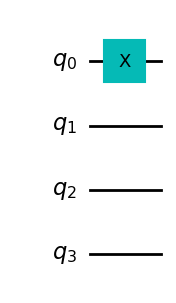

In [98]:
psi_prep = QuantumCircuit(4)
psi_prep.x(0)
display(psi_prep.draw())

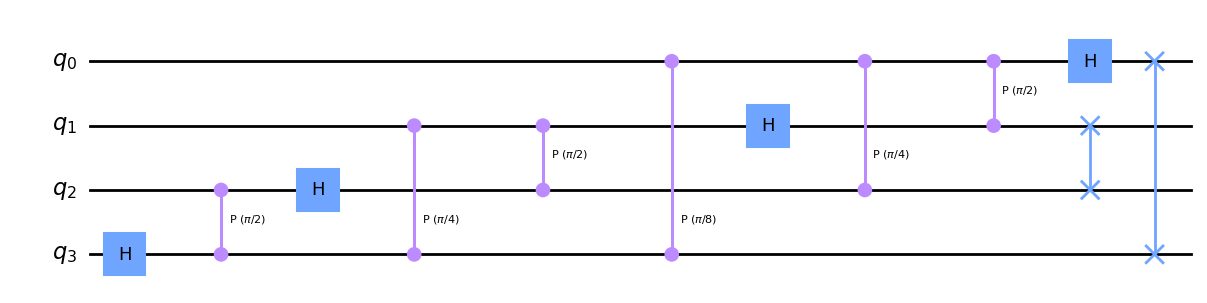

In [97]:
from qiskit.circuit.library import QFT

display(QFT(4).decompose().draw())

In [96]:
from fractions import Fraction
from math import gcd
from qiskit import QuantumCircuit

# Assuming c_amod15 and phase_estimation functions are defined elsewhere
# from your_module import c_amod15, phase_estimation

a = 2
N = 15

FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nAttempt {ATTEMPT}")

    # Define psi_prep
    psi_prep = QuantumCircuit(4)
    psi_prep.x(0)

    phase = phase_estimation(
        c_amod15(a),
        psi_prep,
        precision=8
    )
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    if phase != 0:
        # Guess for a factor is gcd(a^(r/2) - 1, N)
        guess = gcd(pow(a, r // 2) - 1, N)
        if guess not in [1, N] and (N % guess) == 0:
            # Guess is a factor!
            print(f"Period: Non-trivial factor found: {r, guess}")
            FACTOR_FOUND = True



Attempt 1

Attempt 2

Attempt 3

Attempt 4
Period: Non-trivial factor found: (4, 3)
